In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from bmm import bmm
import visualize

Number of means: 10


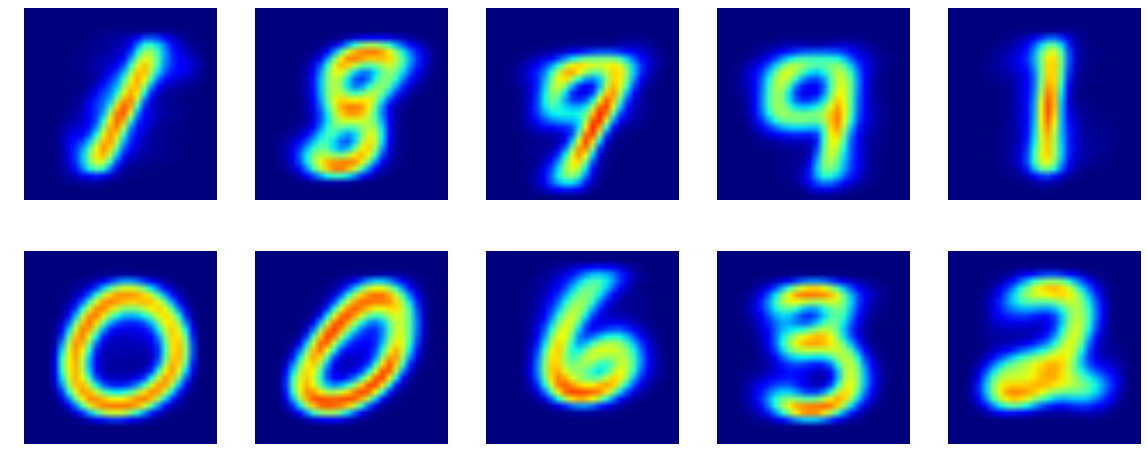

In [2]:
import kmeans as kmeans_

kmeans = kmeans_.load_kmeans('kmeans-10.dat')
visualize.plot_means(kmeans)

In [3]:
# Load MNIST dataset
data_path = '../MNIST'
train_data, train_labels = load_mnist(dataset='training', path=data_path)
test_data, test_labels = load_mnist(dataset='testing', path=data_path)

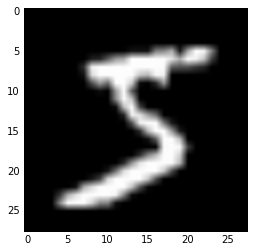

In [4]:
plt.imshow(train_data[0], cmap='gray')

In [5]:
# Reshape data
train_data = np.reshape(train_data, (train_data.shape[0], 784))
test_data = np.reshape(test_data, (test_data.shape[0], 784))

# Bernoulli Mixture Model

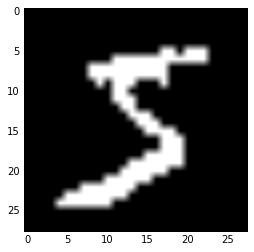

In [6]:
# Making it binary
train_data_binary = np.where(train_data > 0.5, 1, 0)
test_data_binary = np.where(test_data > 0.5, 1, 0)
plt.imshow(np.reshape(train_data_binary[0], (28, 28)), cmap='gray')

In [7]:
model = bmm(10, n_iter=20, verbose=True)

using random heuristic to initialize the means
[00] likelihood = -568.7447954425697 (elapsed 0:00:00.000011)
[01] likelihood = -190.9893873861033 (elapsed 0:00:03.238385)
[02] likelihood = -177.76898929594628 (elapsed 0:00:06.331602)
[03] likelihood = -171.8370297940123 (elapsed 0:00:09.431821)
[04] likelihood = -169.3375409522614 (elapsed 0:00:12.530521)
[05] likelihood = -168.22701444138704 (elapsed 0:00:15.638988)
[06] likelihood = -167.49335611707937 (elapsed 0:00:18.746143)
[07] likelihood = -166.95695924390253 (elapsed 0:00:21.852179)
[08] likelihood = -166.59166626430394 (elapsed 0:00:24.957374)
[09] likelihood = -166.3484840425897 (elapsed 0:00:28.064057)
[10] likelihood = -166.19972436218973 (elapsed 0:00:31.171494)
[11] likelihood = -166.09848847875028 (elapsed 0:00:34.280970)
[12] likelihood = -166.02241763953984 (elapsed 0:00:37.387654)
[13] likelihood = -165.9734568000099 (elapsed 0:00:40.497298)
[14] likelihood = -165.93390782770945 (elapsed 0:00:43.603479)
[15] likelihoo

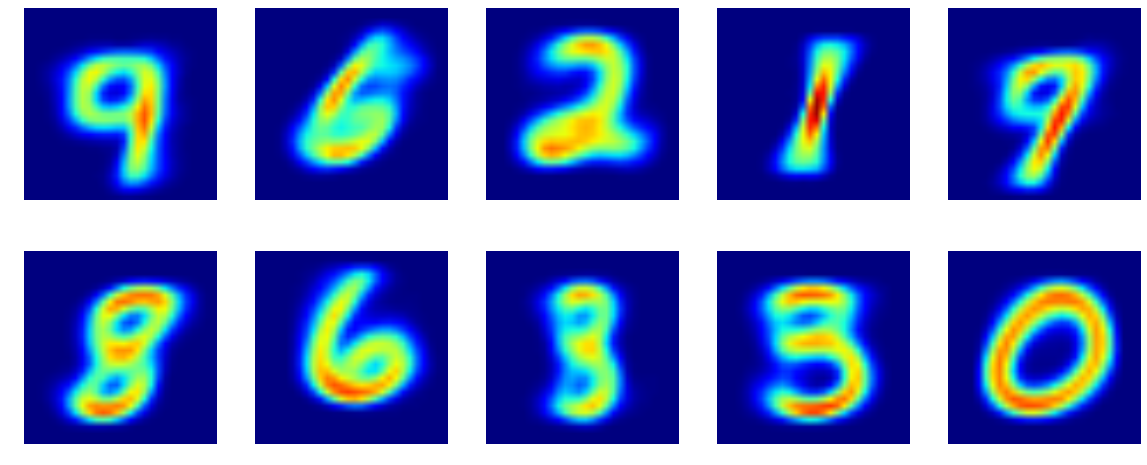

In [8]:
import visualize
model.fit(train_data_binary, means_init_heuristic='random')
visualize.plot_means(model.means)

using data_classes_mean heuristic to initialize the means
[00] likelihood = -170.0721754394032 (elapsed 0:00:00.000025)
[01] likelihood = -168.48184456985467 (elapsed 0:00:03.109455)
[02] likelihood = -167.47609486286774 (elapsed 0:00:06.253904)
[03] likelihood = -166.86314656637327 (elapsed 0:00:09.357631)
[04] likelihood = -166.50318153203176 (elapsed 0:00:12.465661)
[05] likelihood = -166.2674235380959 (elapsed 0:00:15.627504)
[06] likelihood = -166.10039120351965 (elapsed 0:00:18.790285)
[07] likelihood = -165.99419530199302 (elapsed 0:00:21.898102)
[08] likelihood = -165.9117273097042 (elapsed 0:00:25.010853)
[09] likelihood = -165.8468430112527 (elapsed 0:00:28.173921)
[10] likelihood = -165.79296046410198 (elapsed 0:00:31.337134)
[11] likelihood = -165.75368606492944 (elapsed 0:00:34.449491)
[12] likelihood = -165.72760330768065 (elapsed 0:00:37.559824)
[13] likelihood = -165.70292977875587 (elapsed 0:00:40.726269)
[14] likelihood = -165.68259518731233 (elapsed 0:00:43.895982)
[

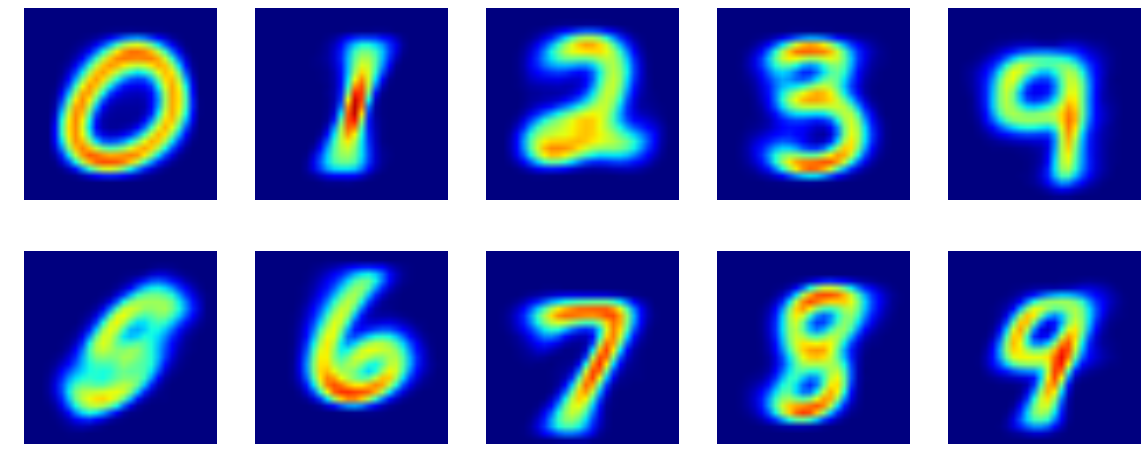

In [9]:
model2 = bmm(10, verbose=True)
model2.fit(train_data_binary, means_init_heuristic='data_classes_mean', labels=train_labels)
visualize.plot_means(model2.means)

# Classification using BMM

In [10]:
from classifier import classifier

# number of components for each BMM
k = 10

bayesian_classifier = classifier(k, means_init_heuristic='kmeans',
                                 means=kmeans, model_type='bmm')

bayesian_classifier.fit(train_data_binary, train_labels)

training label 0 (5923 samples)
converged in 66 iterations in 0:00:21.450448
training label 1 (6742 samples)
converged in 41 iterations in 0:00:14.867834
training label 2 (5958 samples)
converged in 53 iterations in 0:00:17.440692
training label 3 (6131 samples)
converged in 58 iterations in 0:00:19.954195
training label 4 (5842 samples)
converged in 43 iterations in 0:00:14.199735
training label 5 (5421 samples)
converged in 62 iterations in 0:00:18.706564
training label 6 (5918 samples)
converged in 53 iterations in 0:00:17.437920
training label 7 (6265 samples)
converged in 101 iterations in 0:00:34.547184
training label 8 (5851 samples)
converged in 81 iterations in 0:00:26.399630
training label 9 (5949 samples)
converged in 60 iterations in 0:00:19.577842


Number of means: 10


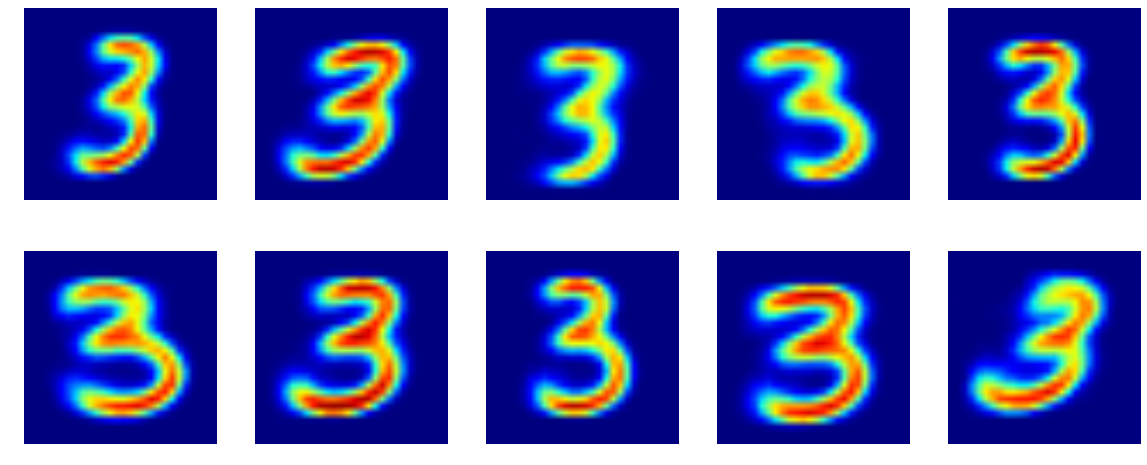

Number of means: 10


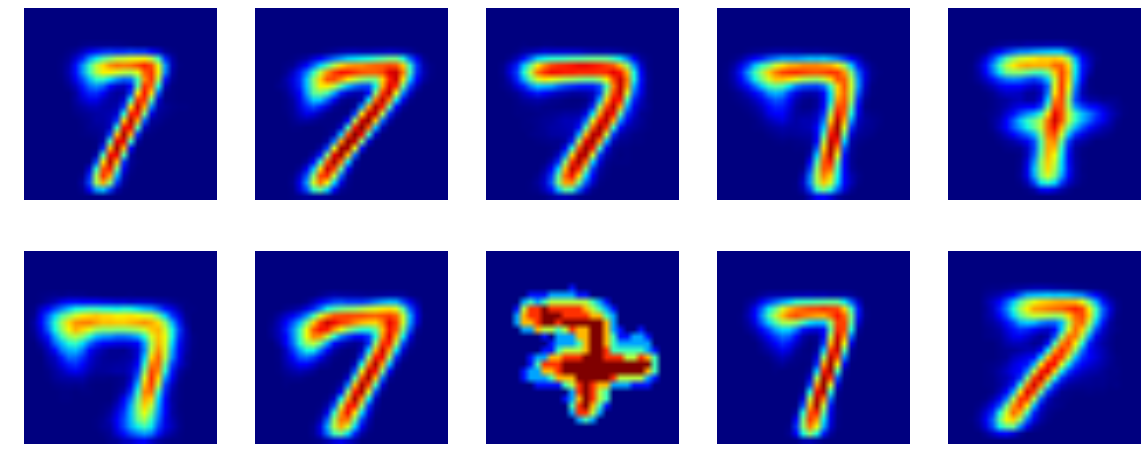

In [11]:
visualize.plot_means(bayesian_classifier.models[3].means)
visualize.plot_means(bayesian_classifier.models[7].means)

In [12]:
label_set = set(train_labels)
predicted_labels = bayesian_classifier.predict(test_data_binary, label_set)

print('Accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

Accuracy: 0.9248
